Homework 3

Generate dataset using make_blobs function in the sklearn.datasets class. 

Generate 2000 samples with 3 features (X) with one label (y).

Explore and analyse raw data.

Do preprocessing for classification.

Split your dataset into train and test test (0.7 for train and 0.3 for test).

Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)

Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [ ]:
#libraries 
from sklearn.datasets import make_blobs
#imported make blobs  data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import csv 
import re 

from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from numpy import where
from matplotlib import pyplot

from sklearn.datasets import make_blobs
plt.rcParams['figure.figsize'] = (15.0, 8.0)

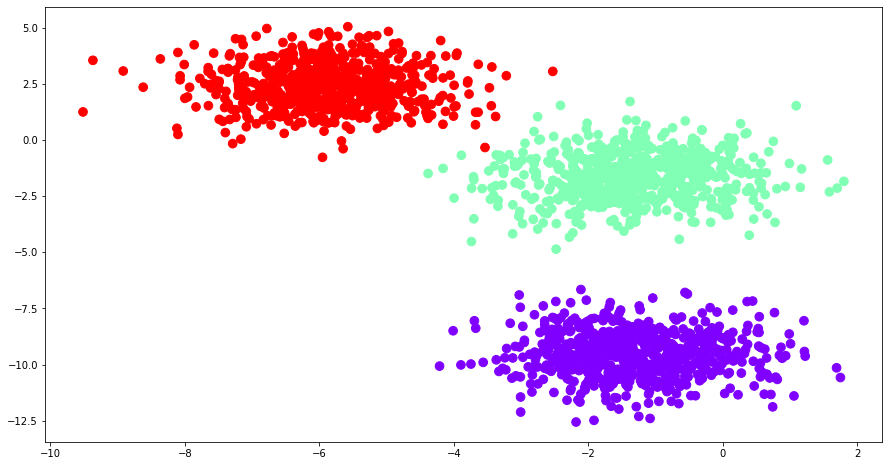

In [ ]:
#make_blobs library generate 2000 samples 
X, y = make_blobs(n_samples=2000, n_features=3,
                  random_state=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=75, cmap='rainbow');

In [ ]:
#generate data with 3 features and one label y
X, y = make_blobs(n_samples=2000,  n_features=3, random_state=2)
#number of feattures=3 label =1 total 4

In [ ]:
print(X.shape)

(2000, 3)


In [ ]:
#y is categorical. encode it. 
from keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

exploring raw data 

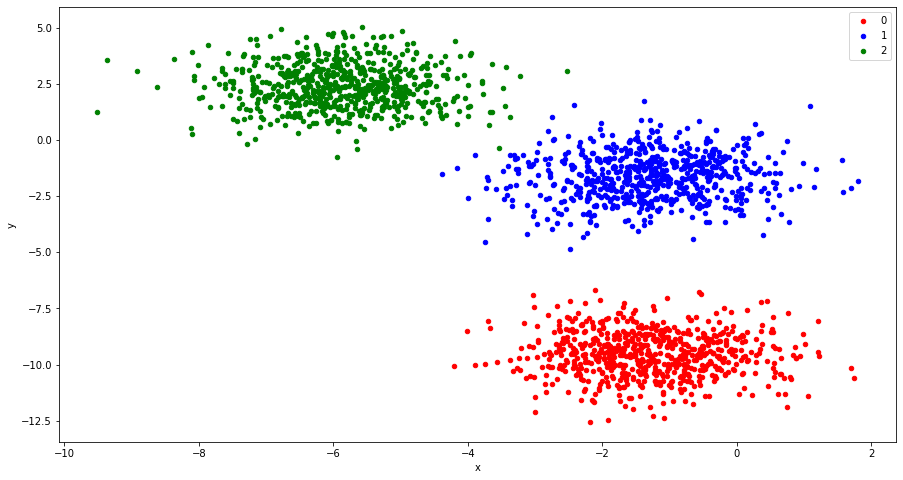

In [ ]:
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [ ]:
#split dataset as 0.7 train 0.3 test set
n_train = int(0.3 * X.shape[0])
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

In [ ]:
#no scaling is needed for Decision tree
#define decision tree model 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

In [ ]:
#fit and train decision tree model. 
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9983333333333333
Accuracy of test: 0.995


In [ ]:
#effect of different depths depth=4 and depth =3 has same accuracy
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9983333333333333
Accuracy of test: 0.995


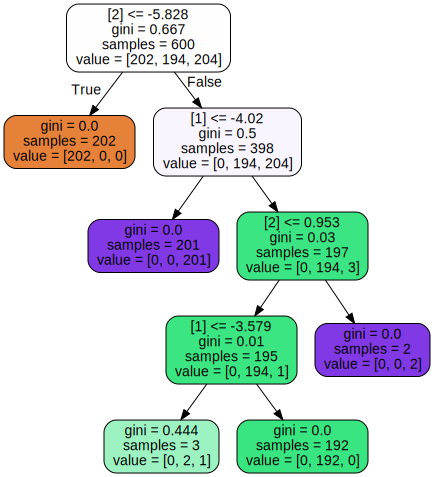

In [ ]:
#Visualization

import os
from sklearn.tree import export_graphviz
# We need to locate graphiz directory for visualization (after conda)
os.environ["PATH"] += ';' + r'C:\Users\Dell\Anaconda3\Library\bin\graphviz'

import graphviz

dot_data = export_graphviz(clf, out_file=None,
                     feature_names=([1],[2],[3]),
                     class_names=None,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

observations in the test set are firstly seperated nearly equal but when depth increases, observations belong to a specific group. 

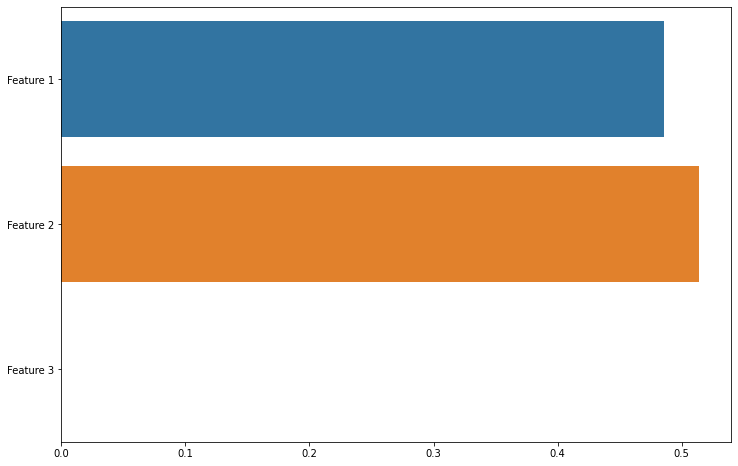

In [ ]:
#Feature Importance

plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=["Feature 1","Feature 2","Feature 3"])
plt.show()
#Feature 1 and 2 effects model nearly equal. Feature 3 has no effect

In [ ]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))
#we have overfitting problem for all labels. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       465
           1       1.00      0.99      0.99       473
           2       0.99      1.00      0.99       462

    accuracy                           0.99      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      0.99      1.00      1400



In [ ]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9950050940414966
Recall = 0.9950501694687741
Accuracy = 0.995
F1 Score = 0.9950087071178734


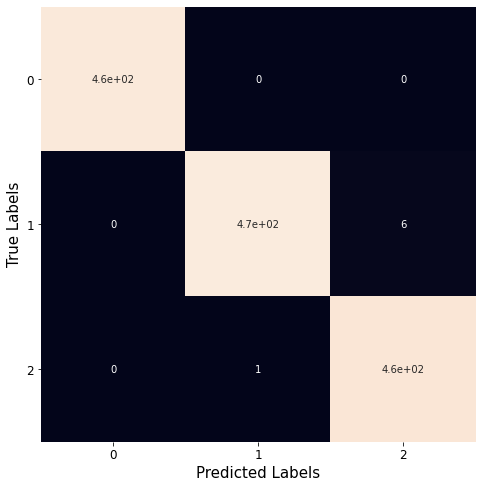

In [ ]:
# Confusion Matrix
#only 7 instances are misclassified 
from sklearn.metrics import confusion_matrix
categories = list([0, 1, 2])
categories
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

Overfitting problem 

In [ ]:
import xgboost as xgb

In [ ]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [ ]:
categories

[0, 1, 2]

In [ ]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.00210987, 0.99579287, 0.00209725],
       [0.00210987, 0.99579287, 0.00209725],
       [0.99531096, 0.00250609, 0.00218297],
       [0.00212771, 0.00233323, 0.995539  ],
       [0.00212771, 0.00233323, 0.995539  ],
       [0.99531096, 0.00250609, 0.00218297],
       [0.00210987, 0.99579287, 0.00209725],
       [0.99531096, 0.00250609, 0.00218297],
       [0.00307678, 0.99212426, 0.004799  ],
       [0.00210987, 0.99579287, 0.00209725]], dtype=float32)

In [ ]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [ ]:
best_preds

array([1, 1, 0, ..., 2, 0, 1])

In [ ]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9943004691398696
Recall = 0.99434544783382
Accuracy = 0.9942857142857143


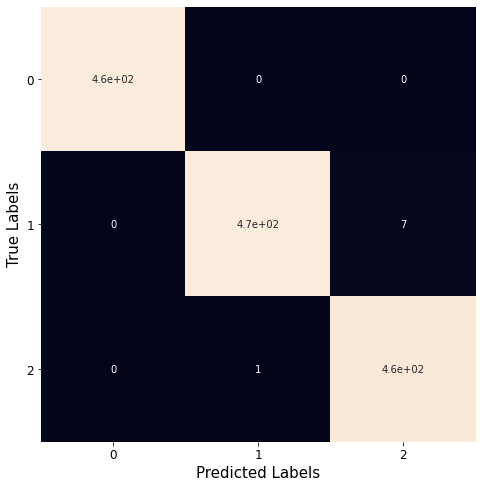

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()
#8 instances are misclassified. 

In [ ]:
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

Tuned: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1000}
Mean of the cv scores is 0.995000
Train Score 1.000000
Test Score 0.995714
Seconds used for refitting the best model on the train dataset: 1.239869


After we set XGboost, results are getting better for both train and test scores with max depth =3 

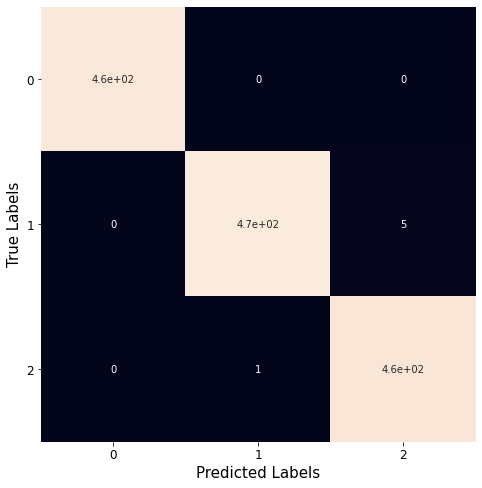

In [ ]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()
#Just 6 samples are evaluated as misclassified. 